<a href="https://colab.research.google.com/github/FabianNurRohman/UAS-AI/blob/main/ProjectUASAI_4D_Kel_Fabian_%26_Dicky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 4s 0us/step


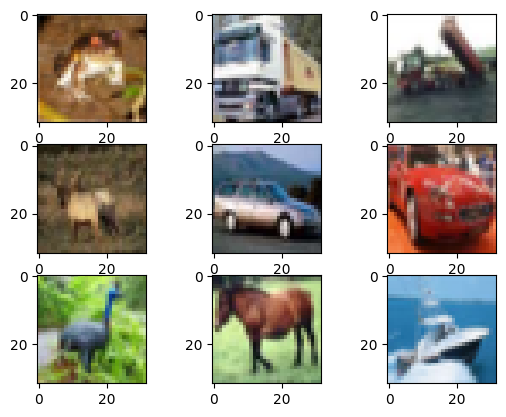

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Display a few sample images from the dataset
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Epoch 1/10
782/782 [==============================] - 67s 84ms/step - loss: 1.7711 - accuracy: 0.3475 - val_loss: 1.4138 - val_accuracy: 0.4809
Epoch 2/10
782/782 [==============================] - 67s 86ms/step - loss: 1.4407 - accuracy: 0.4829 - val_loss: 1.2132 - val_accuracy: 0.5640
Epoch 3/10
782/782 [==============================] - 67s 85ms/step - loss: 1.3030 - accuracy: 0.5376 - val_loss: 1.1219 - val_accuracy: 0.5998
Epoch 4/10
782/782 [==============================] - 69s 88ms/step - loss: 1.2011 - accuracy: 0.5810 - val_loss: 1.1073 - val_accuracy: 0.6154
Epoch 5/10
782/782 [==============================] - 66s 84ms/step - loss: 1.1283 - accuracy: 0.6058 - val_loss: 1.0062 - val_accuracy: 0.6428
Epoch 6/10
782/782 [==============================] - 65s 84ms/step - loss: 1.0647 - accuracy: 0.6311 - val_loss: 0.9829 - val_accuracy: 0.6546
Epoch 7/10
782/782 [==============================] - 63s 81ms/step - loss: 1.0139 - accuracy: 0.6487 - val_loss: 0.9300 - val_accuracy:

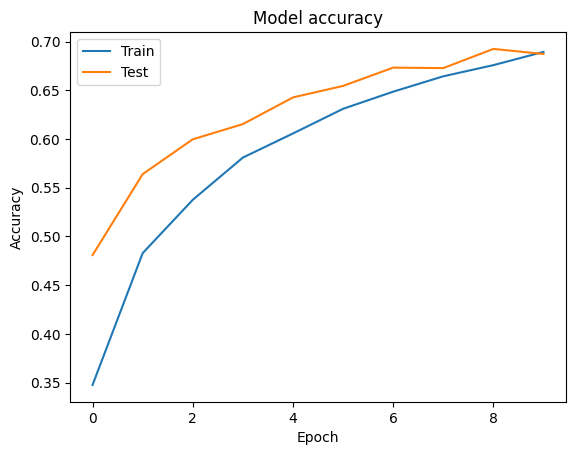

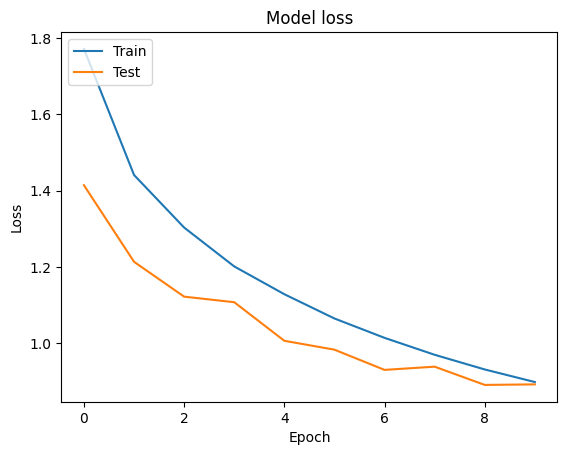

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 3s - loss: 0.8920 - accuracy: 0.6874 - 3s/epoch - 11ms/step
Test accuracy: 0.6873999834060669


313/313 [==============================] - 4s 13ms/step


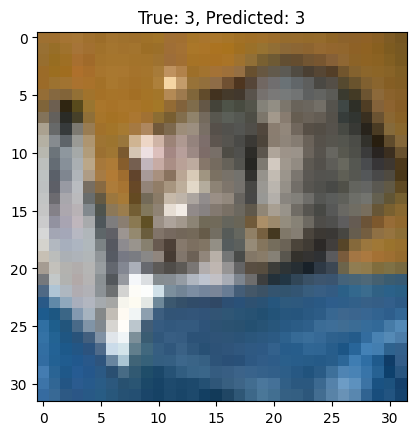

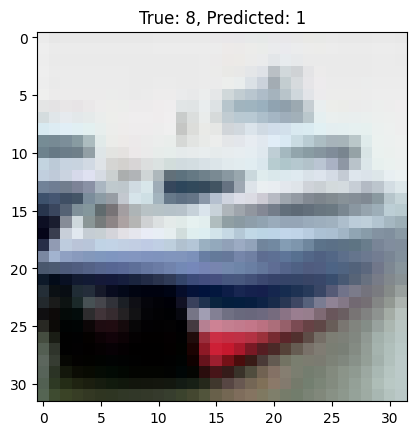

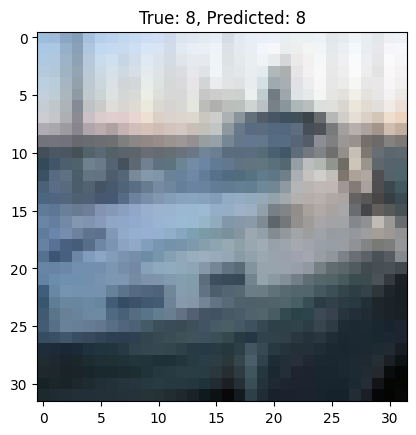

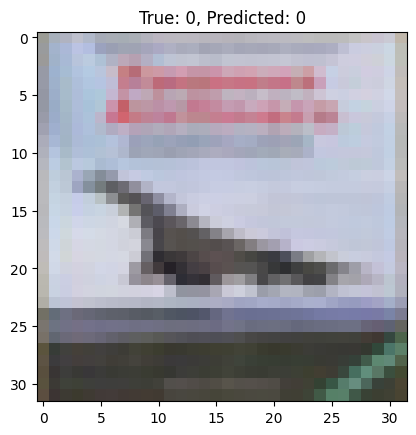

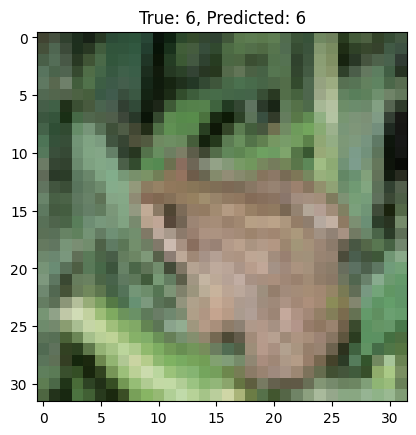

In [ ]:
# Make predictions
predictions = model.predict(x_test)

# Show a few prediction results
import numpy as np

# Function to display image with predicted and true label
def display_prediction(index):
    plt.imshow(x_test[index])
    plt.title(f"True: {np.argmax(y_test[index])}, Predicted: {np.argmax(predictions[index])}")
    plt.show()

# Display predictions for first 5 test images
for i in range(5):
    display_prediction(i)